In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
label_file= "/cxldata/dlcourse/mask_rcnn_model_data/object_detection_classes_coco.txt"

In [7]:
LABELS = open(label_file).read().strip().split("\n")

In [8]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [9]:
LABELS[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [10]:
weights = "/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_frozen_inference_graph.pb"

In [11]:
config = "/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [12]:
net = cv2.dnn.readNetFromTensorflow(weights, config)

In [13]:
img = cv2.imread('/cxldata/dlcourse/mask_rcnn_model_data/dining_table.jpg')

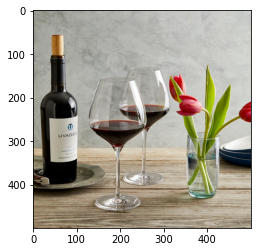

In [14]:
plt.imshow(fixColor(img))

In [15]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)

In [16]:
net.setInput(blob)

In [17]:
(boxes, masks_polygons) = net.forward(["detection_out_final",
"detection_masks"])

In [18]:
boxes.shape

(1, 1, 7, 7)

In [19]:
masks_polygons.shape

(100, 90, 15, 15)

In [20]:
threshold = 0.9

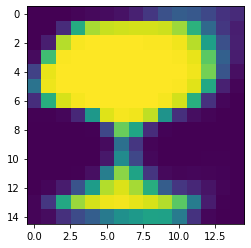

Shape of individual mask (15, 15)
Mask after resize (328, 148)
Mask after threshold (328, 148)
ROI Shape (17224, 3)
wine glass [156, 21, 112]


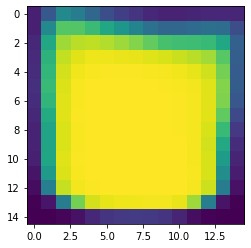

Shape of individual mask (15, 15)
Mask after resize (154, 81)
Mask after threshold (154, 81)
ROI Shape (7751, 3)
vase [166, 56, 167]


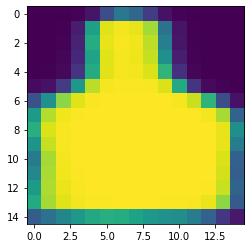

Shape of individual mask (15, 15)
Mask after resize (344, 83)
Mask after threshold (344, 83)
ROI Shape (16398, 3)
bottle [209, 226, 77]


In [21]:
for i in range(0, boxes.shape[2]): #For each detection
    classID = int(boxes[0, 0, i, 1]) #Class ID
    confidence = boxes[0, 0, i, 2] #Confidence scores
    if confidence > threshold:
        (H, W) = img.shape[:2]
        box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H]) #Bounding box
        (startX, startY, endX, endY) = box.astype("int")
        boxW = endX - startX
        boxH = endY - startY

        # extract the pixel-wise segmentation for the object, and visualize the mask       
        mask = masks_polygons[i, classID]
        plt.imshow(mask)
        plt.show()
        print ("Shape of individual mask", mask.shape)

        # resize the mask such that it's the same dimensions of
        # the bounding box, and interpolation gives individual pixel positions
        mask = cv2.resize(mask, (boxW, boxH), interpolation=cv2.INTER_CUBIC)

        print ("Mask after resize", mask.shape)
        # then finally threshold to create a *binary* mask
        mask = (mask > 0.65)
        print ("Mask after threshold", mask.shape)
        # extract the ROI of the image but *only* extracted the
        # masked region of the ROI
        roi = img[startY:endY, startX:endX][mask]
        print ("ROI Shape", roi.shape)

        # grab the color used to visualize this particular class,
        # then create a transparent overlay by blending the color
        # with the ROI
        color = COLORS[classID]
        blended = ((0.5 * color) + (0.5 * roi)).astype("uint8")

        # Change the colors in the original to blended color
        img[startY:endY, startX:endX][mask] = blended

        color = COLORS[classID]
        color = [int(c) for c in color]
        print (LABELS[classID], color)
         
        confidence_percentage = confidence * 100 
        cv2.rectangle(img, (startX, startY), (endX, endY), color, 3)
        text = "{}: {:.2f}%".format(LABELS[classID], confidence_percentage)


# Draw the text on the image with adjusted position
        cv2.putText(img, text, (startX-18, startY-15), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
        

(-0.5, 499.5, 499.5, -0.5)

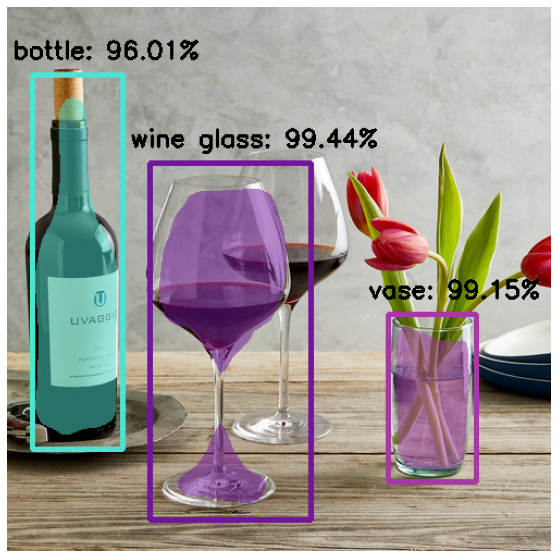

In [22]:
plt.clf
plt.figure(figsize=(10, 10))
plt.imshow(fixColor(img))
plt.savefig("output_image.png", dpi=300)  # Save with higher DPI for better resolution
plt.axis('off')  # Hide axes


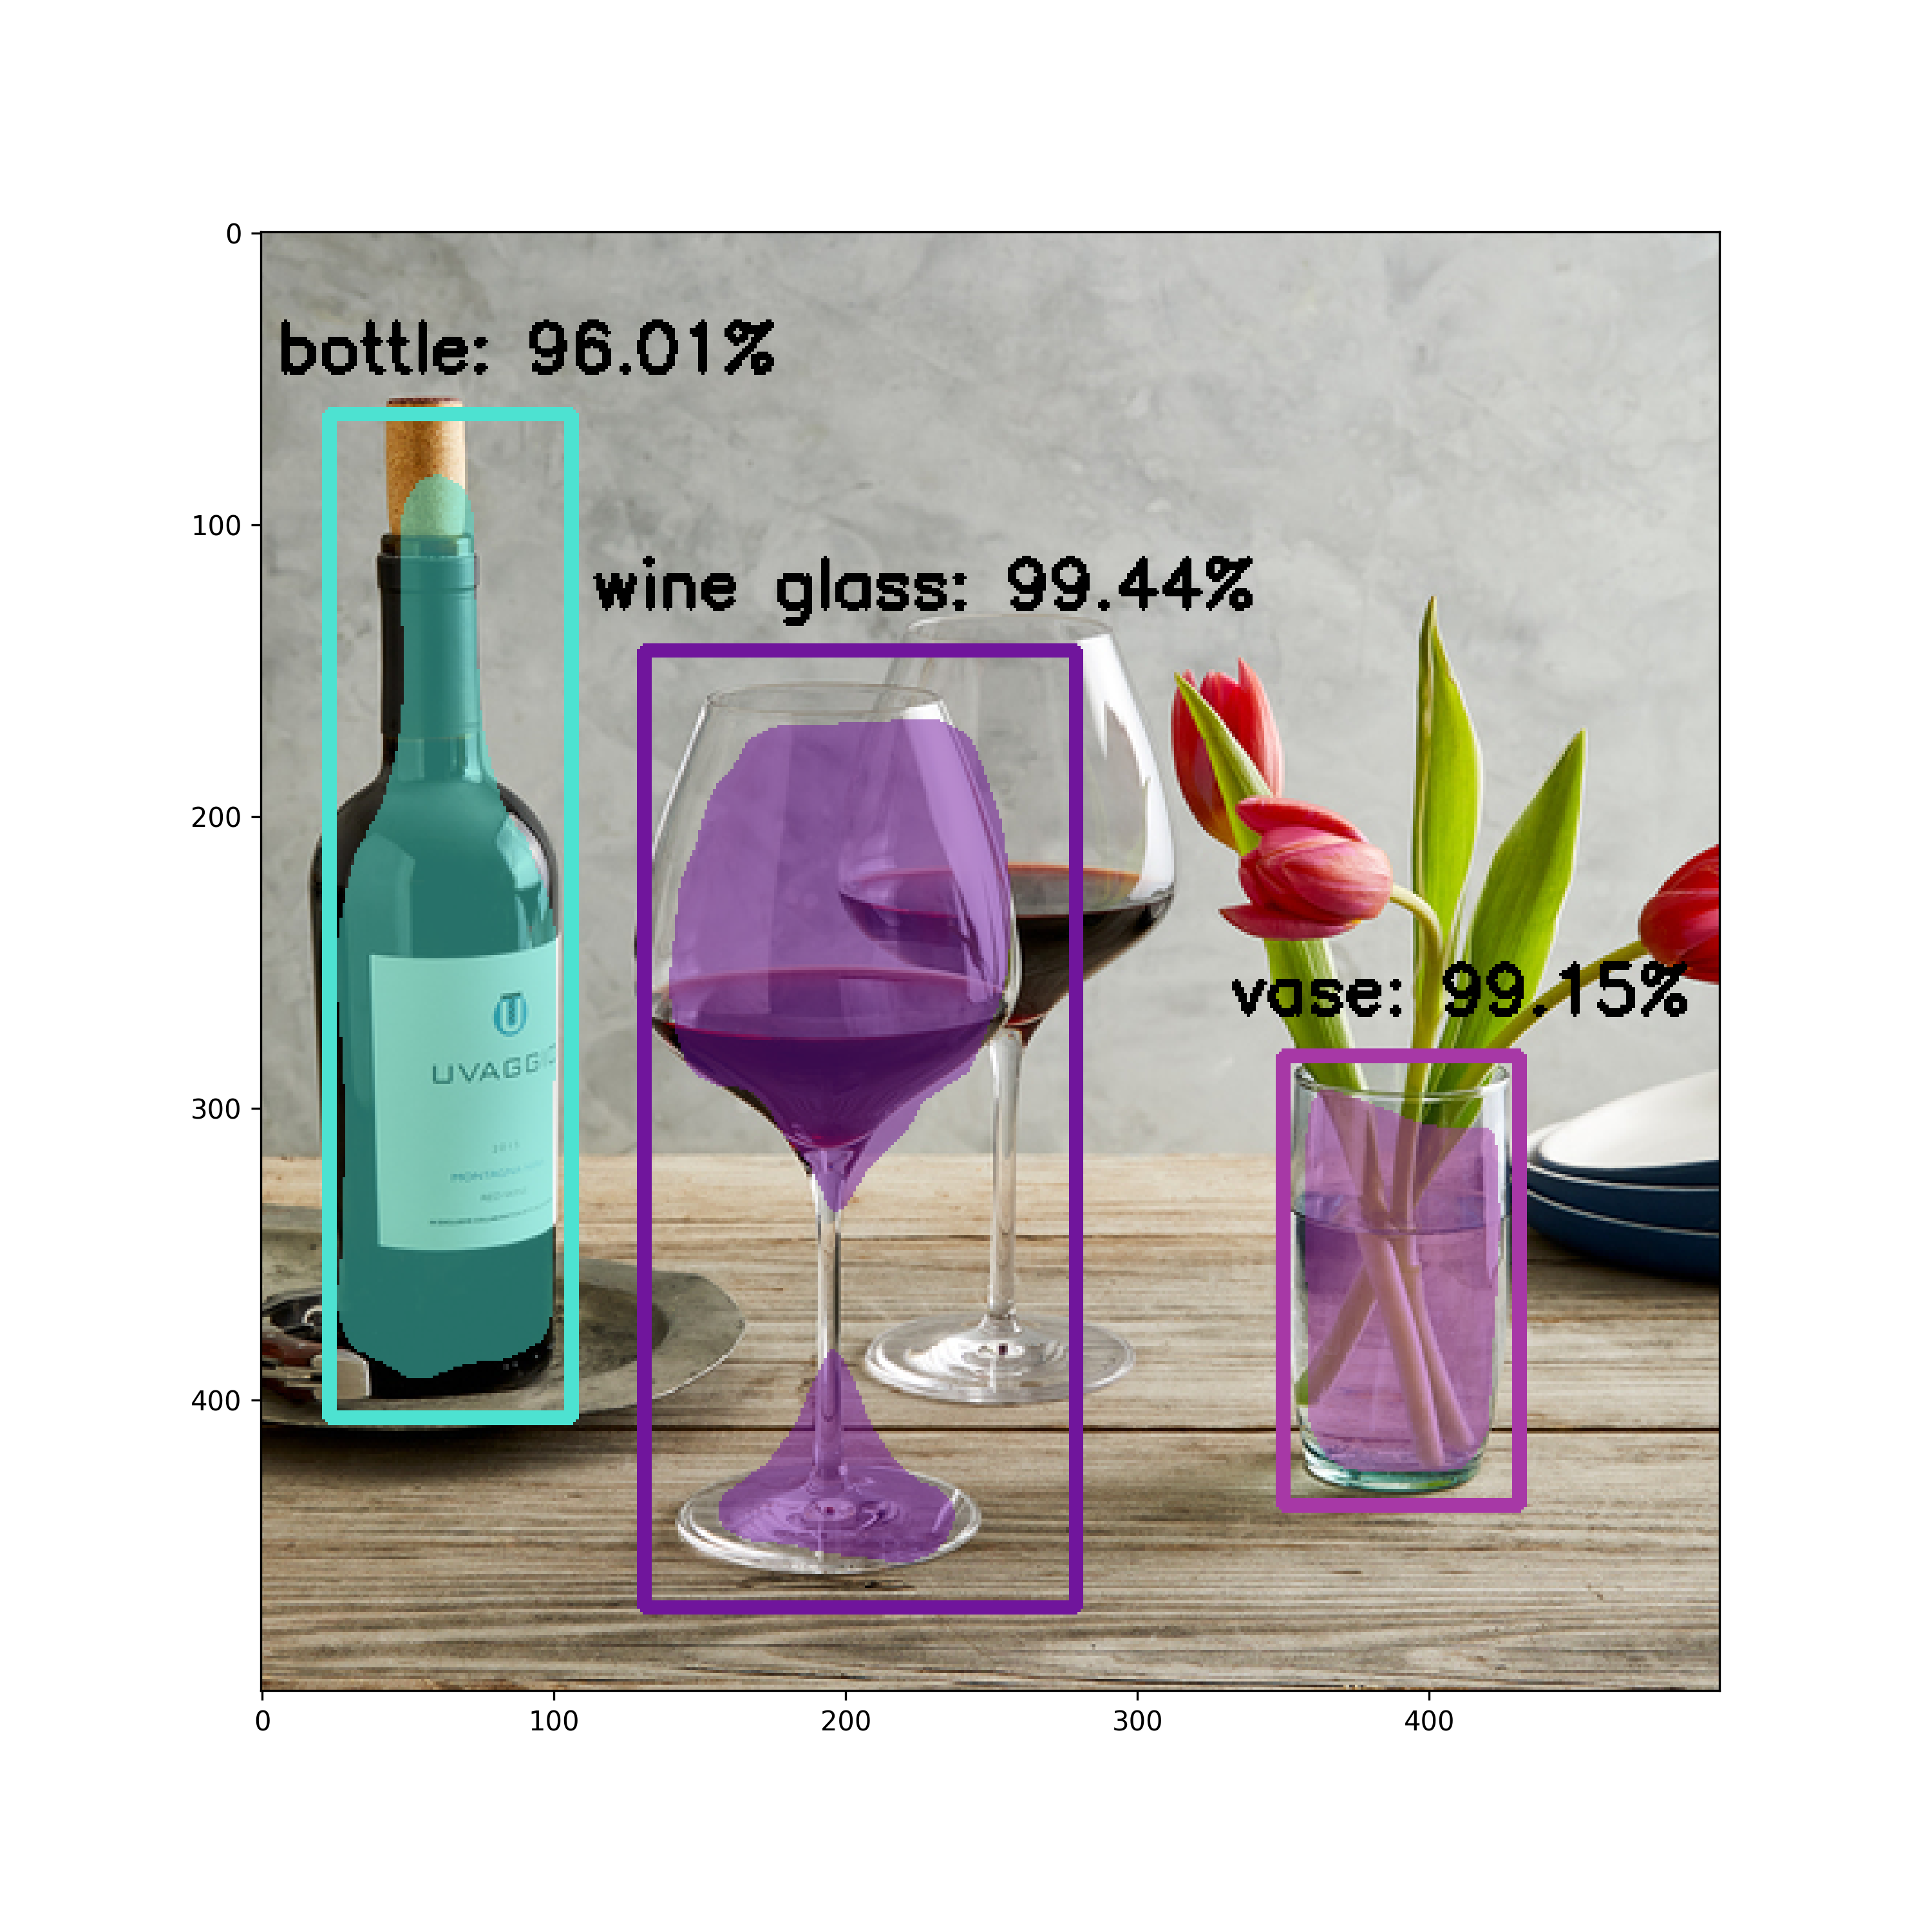

In [23]:
from IPython.display import Image, display

# Display the image in the notebook
display(Image(filename='output_image.png'))